In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [75]:
df=pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [77]:
df.dropna(subset='CustomerID',inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [78]:
df['CustomerID']=df['CustomerID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [79]:
df['TotalPrice']=df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [80]:
df['Year']=df['InvoiceDate'].dt.year

In [81]:
df['Month']=df['InvoiceDate'].dt.month

In [82]:
df['Day']=df['InvoiceDate'].dt.day

In [83]:
df['Hour'] = df['InvoiceDate'].dt.hour 

In [84]:
last_purchase=df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

In [85]:
last_purchase.columns=['CustomerID','LastPurchaseDate']
last_purchase

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4367,18280.0,2011-03-07 09:52:00
4368,18281.0,2011-06-12 10:53:00
4369,18282.0,2011-12-02 11:43:00
4370,18283.0,2011-12-06 12:02:00


In [86]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [87]:
Reference_date=pd.to_datetime('2011-12-09 12:50:00')

In [88]:
last_purchase['Recency'] = (Reference_date - last_purchase['LastPurchaseDate']).dt.days
last_purchase

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309
...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277
4368,18281.0,2011-06-12 10:53:00,180
4369,18282.0,2011-12-02 11:43:00,7
4370,18283.0,2011-12-06 12:02:00,3


In [89]:
frequency=df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns=['CustomerID','Frequency']
frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [95]:
monetary=df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns=['CustomerID','Monetary']
monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [99]:
monetary[monetary['Monetary']==0.0]

,CustomerID,Monetary
0,12346.0,0.0
692,13256.0,0.0
775,13364.0,0.0
1642,14557.0,0.0
1809,14792.0,0.0
3245,16742.0,0.0
3349,16878.0,0.0
4358,18268.0,0.0


In [100]:
rfm=last_purchase.merge(frequency, on='CustomerID')
rfm

,CustomerID,LastPurchaseDate,Recency,Frequency
0,12346.0,2011-01-18 10:17:00,325,2
1,12347.0,2011-12-07 15:52:00,1,7
2,12348.0,2011-09-25 13:13:00,74,4
3,12349.0,2011-11-21 09:51:00,18,1
4,12350.0,2011-02-02 16:01:00,309,1
...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1
4368,18281.0,2011-06-12 10:53:00,180,1
4369,18282.0,2011-12-02 11:43:00,7,3
4370,18283.0,2011-12-06 12:02:00,3,16


In [101]:
rfm = rfm.merge(monetary, on='CustomerID')
rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60
4368,18281.0,2011-06-12 10:53:00,180,1,80.82
4369,18282.0,2011-12-02 11:43:00,7,3,176.60
4370,18283.0,2011-12-06 12:02:00,3,16,2094.88


In [103]:
rfm['R_Score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1]).astype(int)
rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score
0,12346.0,2011-01-18 10:17:00,325,2,0.00,1
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,5
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,2
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,4
4,12350.0,2011-02-02 16:01:00,309,1,334.40,1
...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60,1
4368,18281.0,2011-06-12 10:53:00,180,1,80.82,1
4369,18282.0,2011-12-02 11:43:00,7,3,176.60,5
4370,18283.0,2011-12-06 12:02:00,3,16,2094.88,5


In [110]:
rfm['F_Score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(int)
rfm


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score
0,12346.0,2011-01-18 10:17:00,325,2,0.00,1,2
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,5,4
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,2,3
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,4,1
4,12350.0,2011-02-02 16:01:00,309,1,334.40,1,1
...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60,1,2
4368,18281.0,2011-06-12 10:53:00,180,1,80.82,1,2
4369,18282.0,2011-12-02 11:43:00,7,3,176.60,5,3
4370,18283.0,2011-12-06 12:02:00,3,16,2094.88,5,5


In [111]:
rfm['M_Score']=pd.qcut(rfm['Monetary'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(int)
rfm


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,2011-01-18 10:17:00,325,2,0.00,1,2,1
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,5,4,5
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,2,3,4
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,4,1,4
4,12350.0,2011-02-02 16:01:00,309,1,334.40,1,1,2
...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60,1,2,1
4368,18281.0,2011-06-12 10:53:00,180,1,80.82,1,2,1
4369,18282.0,2011-12-02 11:43:00,7,3,176.60,5,3,1
4370,18283.0,2011-12-06 12:02:00,3,16,2094.88,5,5,5


In [115]:
rfm['RFM_Score']=rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,2011-01-18 10:17:00,325,2,0.00,1,2,1,121
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,5,4,5,545
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,2,3,4,234
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,4,1,4,414
4,12350.0,2011-02-02 16:01:00,309,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60,1,2,1,121
4368,18281.0,2011-06-12 10:53:00,180,1,80.82,1,2,1,121
4369,18282.0,2011-12-02 11:43:00,7,3,176.60,5,3,1,531
4370,18283.0,2011-12-06 12:02:00,3,16,2094.88,5,5,5,555


In [218]:

rfm.loc[rfm['RFM_Score'].str.match(r'[4-5][4-5][4-5]'), 'Segment'] = 'Champion'
rfm.loc[rfm['RFM_Score'].str.match(r'[3-5][3-5][3-5]'), 'Segment'] = 'Loyal'
rfm.loc[rfm['RFM_Score'].str.match(r'[4-5][1-2][4-5]'), 'Segment'] = 'Recent High Spender'
rfm.loc[rfm['RFM_Score'].str.match(r'5[1-2][1-3]'), 'Segment'] = 'New Customer'
rfm.loc[rfm['RFM_Score'].str.match(r'[4-5][2-5][1-5]'), 'Segment'] = 'Potential Loyalist'
rfm.loc[rfm['RFM_Score'].str.match(r'[3-4][1-4][1-3]'), 'Segment'] = 'Need Attention'
rfm.loc[rfm['RFM_Score'].str.match(r'[3-4][1-2][1-3]'), 'Segment'] = 'Hibernating'
rfm.loc[rfm['RFM_Score'].str.match(r'[1-2][3-5][1-5]'), 'Segment'] = 'At Risk'
rfm.loc[rfm['RFM_Score'].str.match(r'[1-3][1-3][3-5]'), 'Segment'] = 'Dormant Big Spender'
rfm.loc[rfm['RFM_Score'].str.match(r'[1-2][1-2][1-2]'), 'Segment'] = 'Lost'


In [185]:
rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,2011-01-18 10:17:00,325,2,0.00,1,2,1,121,Lost
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,5,4,5,545,Potential Loyalist
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,2,3,4,234,Dormant Big Spender
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,4,1,4,414,Recent High Spender
4,12350.0,2011-02-02 16:01:00,309,1,334.40,1,1,2,112,Lost
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60,1,2,1,121,Lost
4368,18281.0,2011-06-12 10:53:00,180,1,80.82,1,2,1,121,Lost
4369,18282.0,2011-12-02 11:43:00,7,3,176.60,5,3,1,531,Potential Loyalist
4370,18283.0,2011-12-06 12:02:00,3,16,2094.88,5,5,5,555,Potential Loyalist


In [186]:
rfm['Segment'].value_counts()

Segment
Potential Loyalist     1306
Lost                    809
Dormant Big Spender     669
At Risk                 479
Hibernating             464
Need Attention          355
Loyal                   248
New Customer             40
Recent High Spender       2
Name: count, dtype: int64

In [187]:
rfm['Marketing_Action'] = rfm['Segment'].map({
    'Champion': 'Send VIP offers & early access',
    'Loyal': 'Offer loyalty rewards or exclusive deals',
    'Recent High Spender': 'Cross-sell with next-order discount',
    'New Customer': 'Welcome campaign + discount on 2nd order',
    'Potential Loyalist': 'Bundle deals or subscription push',
    'Need Attention': 'Send reminder + limited-time discount',
    'Hibernating': 'Reactivation email with flash offer',
    'At Risk': 'Win-back campaign + personalized email',
    'Dormant Big Spender': 'VIP reactivation + concierge support',
    'Lost': 'Automated reactivation with discount',
})
rfm


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Marketing_Action
0,12346.0,2011-01-18 10:17:00,325,2,0.00,1,2,1,121,Lost,Automated reactivation with discount
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,5,4,5,545,Potential Loyalist,Bundle deals or subscription push
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,2,3,4,234,Dormant Big Spender,VIP reactivation + concierge support
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,4,1,4,414,Recent High Spender,Cross-sell with next-order discount
4,12350.0,2011-02-02 16:01:00,309,1,334.40,1,1,2,112,Lost,Automated reactivation with discount
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60,1,2,1,121,Lost,Automated reactivation with discount
4368,18281.0,2011-06-12 10:53:00,180,1,80.82,1,2,1,121,Lost,Automated reactivation with discount
4369,18282.0,2011-12-02 11:43:00,7,3,176.60,5,3,1,531,Potential Loyalist,Bundle deals or subscription push
4370,18283.0,2011-12-06 12:02:00,3,16,2094.88,5,5,5,555,Potential Loyalist,Bundle deals or subscription push


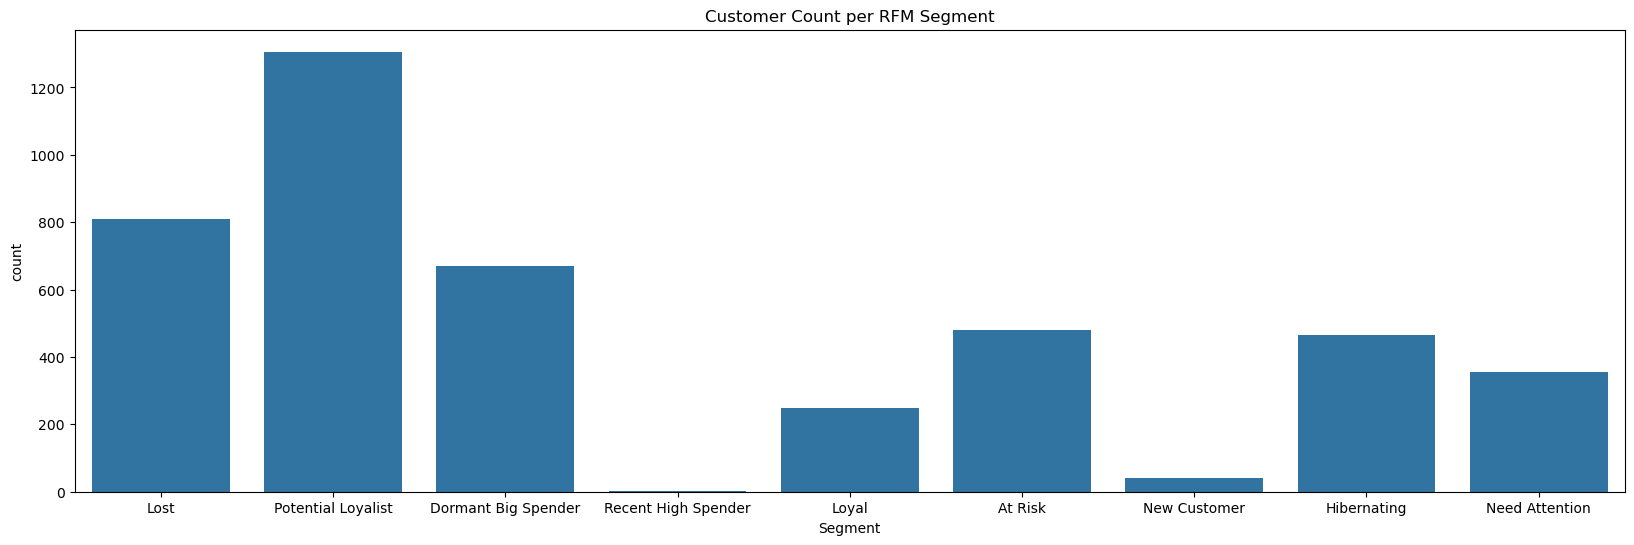

In [209]:
plt.figure(figsize=(20, 6))
sns.countplot(data=rfm, x='Segment')
plt.title('Customer Count per RFM Segment')
plt.show()

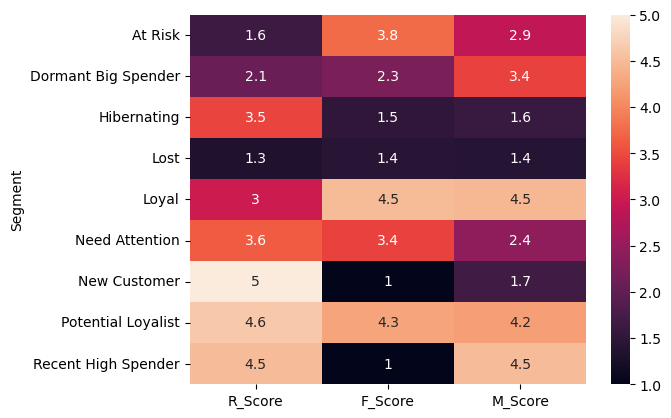

In [217]:
sns.heatmap(rfm.groupby('Segment')[['R_Score', 'F_Score', 'M_Score']].mean(),annot=True)
plt.show()